# Feature Engineering Book Data
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Data Science Course

In [1]:
# Load basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
book = pd.read_excel('/kaggle/input/bookdata/Data_Train.xlsx')
book.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [3]:
book = book.rename(columns={'Reviews': 'Ratings', 'Ratings': 'Reviews'})

In [4]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         5699 non-null   object 
 1   Author        5699 non-null   object 
 2   Edition       5699 non-null   object 
 3   Ratings       5699 non-null   object 
 4   Reviews       5699 non-null   object 
 5   Synopsis      5699 non-null   object 
 6   Genre         5699 non-null   object 
 7   BookCategory  5699 non-null   object 
 8   Price         5699 non-null   float64
dtypes: float64(1), object(8)
memory usage: 400.8+ KB


In [5]:
book.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,5699.0,554.857428,674.363427,25.0,249.0,373.0,599.0,14100.0


In [6]:
book.isnull().sum()

Title           0
Author          0
Edition         0
Ratings         0
Reviews         0
Synopsis        0
Genre           0
BookCategory    0
Price           0
dtype: int64

In [7]:
book.nunique()

Title           5130
Author          3438
Edition         3183
Ratings           36
Reviews          333
Synopsis        5114
Genre            335
BookCategory      11
Price           1538
dtype: int64

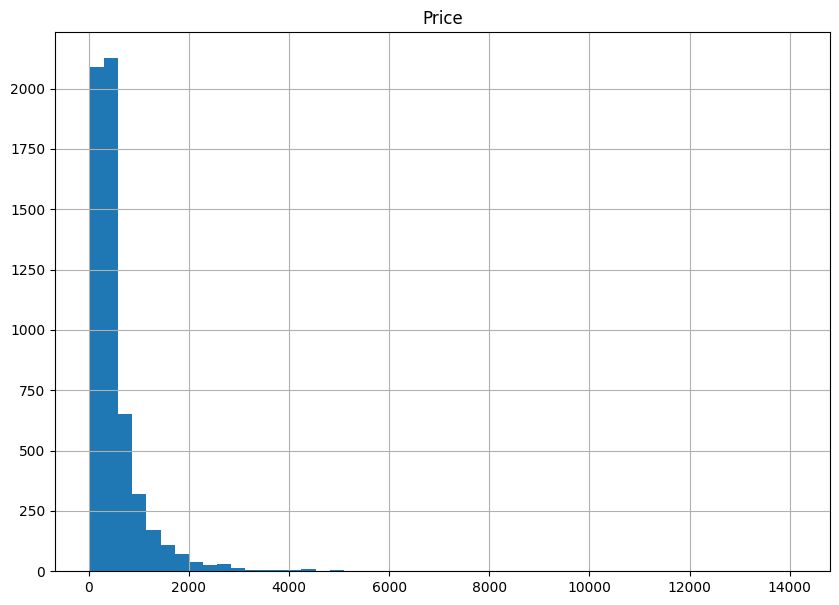

In [8]:
book.hist(bins=50, figsize=(10, 7))
plt.show()

## Univariate Variable Analysis



### Price (Target)

In [9]:
book['Price'].describe()

count     5699.000000
mean       554.857428
std        674.363427
min         25.000000
25%        249.000000
50%        373.000000
75%        599.000000
max      14100.000000
Name: Price, dtype: float64

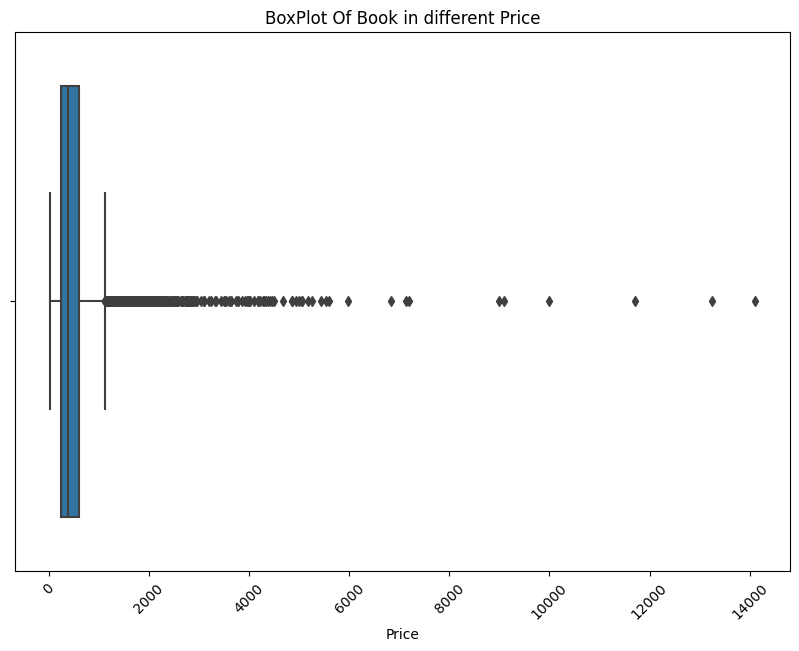

In [10]:
plt.figure(figsize=(10, 7))
sns.boxplot(x=book['Price'])
plt.title('BoxPlot Of Book in different Price')
plt.xticks(rotation=45)
plt.show()

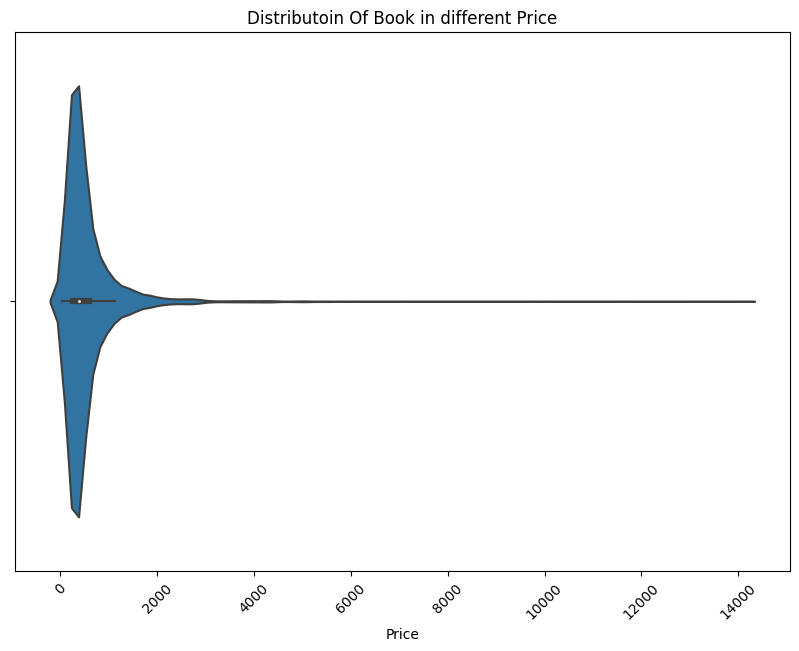

In [11]:
plt.figure(figsize=(10, 7))
sns.violinplot(x=book['Price'])
plt.title('Distributoin Of Book in different Price')
plt.xticks(rotation=45)
plt.show()

In [12]:
drop_outliers = np.array([])
upper_bound = book['Price'].quantile(0.99)
lower_bound = book['Price'].quantile(0.0)

df = book['Price']
indices = df[(df < lower_bound) | (df > upper_bound)].index
drop_outliers = np.append(drop_outliers, indices)

trim_book = book.copy()
dropped = np.unique(drop_outliers)
trim_book.drop(dropped, inplace=True)
trim_book.shape

(5642, 9)

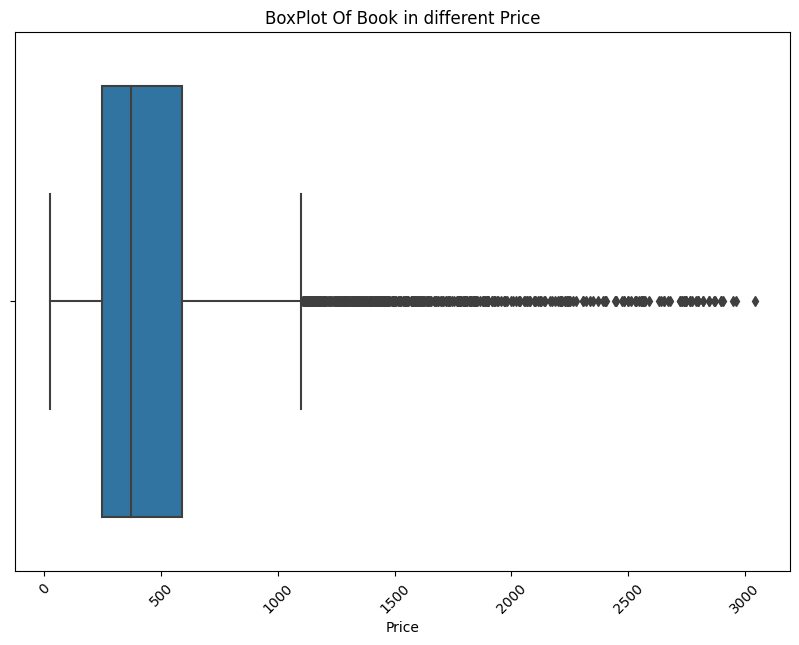

In [13]:
plt.figure(figsize=(10, 7))
sns.boxplot(x=trim_book['Price'])
plt.title('BoxPlot Of Book in different Price')
plt.xticks(rotation=45)
plt.show()

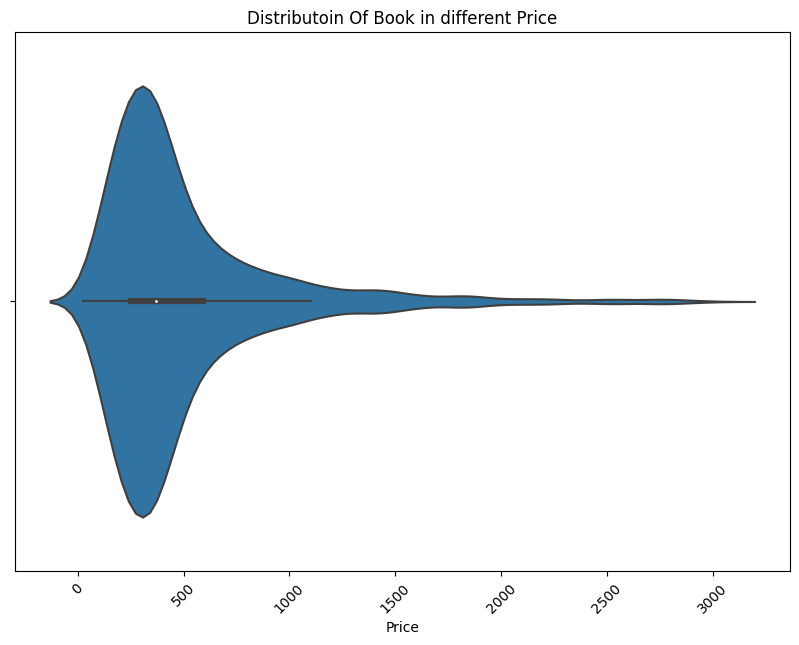

In [14]:
plt.figure(figsize=(10, 7))
sns.violinplot(x=trim_book['Price'])
plt.title('Distributoin Of Book in different Price')
plt.xticks(rotation=45)
plt.show()

In [15]:
book = trim_book

## Basic Data Analysis

### BookCategory

In [16]:
book['BookCategory'].describe()

count                   5642
unique                    11
top       Action & Adventure
freq                     747
Name: BookCategory, dtype: object

In [17]:
category = pd.DataFrame(book.groupby(['BookCategory']).size()).reset_index()
category = category.rename(columns={0: 'NumberOfBook'})
category

,BookCategory,NumberOfBook
0,Action & Adventure,747
1,"Arts, Film & Photography",468
2,"Biographies, Diaries & True Accounts",543
3,Comics & Mangas,530
4,"Computing, Internet & Digital Media",451
5,"Crime, Thriller & Mystery",656
6,Humour,475
7,"Language, Linguistics & Writing",548
8,Politics,291
9,Romance,514


In [18]:
sorted_category = category.sort_values(by=['NumberOfBook'], ascending=False)
sorted_category

,BookCategory,NumberOfBook
0,Action & Adventure,747
5,"Crime, Thriller & Mystery",656
7,"Language, Linguistics & Writing",548
2,"Biographies, Diaries & True Accounts",543
3,Comics & Mangas,530
9,Romance,514
6,Humour,475
1,"Arts, Film & Photography",468
4,"Computing, Internet & Digital Media",451
10,Sports,419


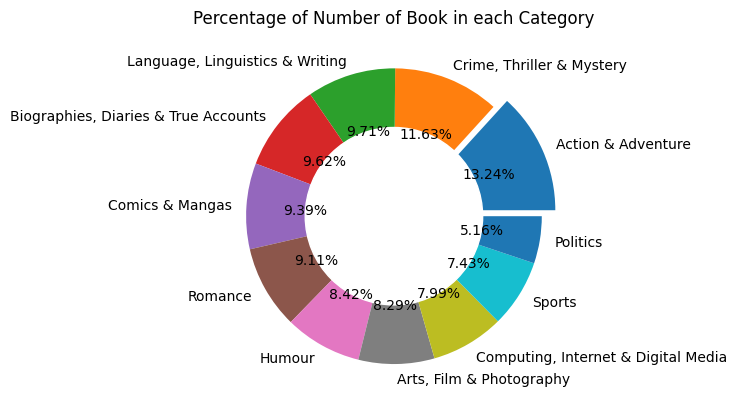

In [19]:
plt.pie(book['BookCategory'].value_counts().values, labels=sorted_category['BookCategory'], autopct='%.2f%%', explode=[0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

plt.title('Percentage of Number of Book in each Category')
center_circle = plt.Circle((0, 0), 0.6, color='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.show()

In [20]:
category_data = book[['BookCategory', 'Price']].groupby('BookCategory').mean()
category_data

,Price
BookCategory,
Action & Adventure,397.619183
"Arts, Film & Photography",736.351282
"Biographies, Diaries & True Accounts",343.575157
Comics & Mangas,643.232340
"Computing, Internet & Digital Media",830.692173
"Crime, Thriller & Mystery",335.230305
Humour,608.697789
"Language, Linguistics & Writing",424.815566
Politics,463.727629


In [21]:
def show_barplot_of_feature(x, y, title, x_label, y_label):
    fig, ax = plt.subplots(figsize=(12,6))

    ax = sns.barplot(x=x, y=y, palette='gnuplot2', color='blue')
    ax1 = ax.twinx()

    total = book.shape[0]
    for i in ax.patches:
        ax.text(i.get_x()+0.04, i.get_height(), \
                '{:,d}'.format(int(i.get_height())), fontsize=12.5, weight='bold',
                color='red')

   
    plt.title(title, fontsize=13, fontweight='bold')
    ax.set_xlabel(x_label, fontsize=13, fontweight='bold')
    ax.set_ylabel(y_label, fontsize=13, fontweight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.show()

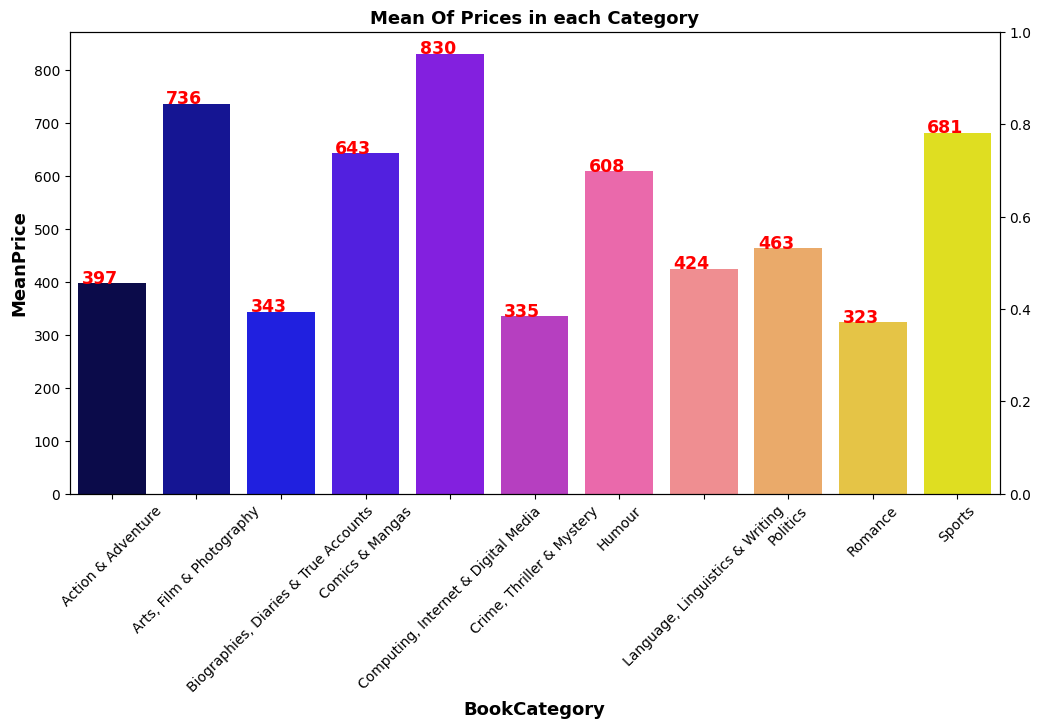

In [22]:
show_barplot_of_feature(category_data.index, category_data['Price'], 'Mean Of Prices in each Category', 'BookCategory', 'MeanPrice')


## Feature Engineering



In [23]:
book.head()

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [24]:
book['Ratings'] = book['Ratings'].str.replace(' out of 5 stars', '').astype(float)
book['Reviews'] = book['Reviews'].str.replace(' customer reviews', '')
book['Reviews'] = book['Reviews'].str.replace(' customer review', '')
book['Reviews'] = book['Reviews'].str.replace(',', '')
book['Reviews'] = book['Reviews'].astype(float)

In [25]:
book.head()

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8.0,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14.0,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6.0,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13.0,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1.0,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [26]:
book['Reviews'].describe()

count    5642.000000
mean       36.173875
std       153.754209
min         1.000000
25%         2.000000
50%         7.000000
75%        22.000000
max      6090.000000
Name: Reviews, dtype: float64

In [27]:
category_data = book[['BookCategory', 'Reviews']].groupby('BookCategory').mean()
category_data

,Reviews
BookCategory,
Action & Adventure,34.852744
"Arts, Film & Photography",15.948718
"Biographies, Diaries & True Accounts",85.244936
Comics & Mangas,14.050943
"Computing, Internet & Digital Media",18.144124
"Crime, Thriller & Mystery",44.716463
Humour,16.957895
"Language, Linguistics & Writing",43.029197
Politics,36.632302


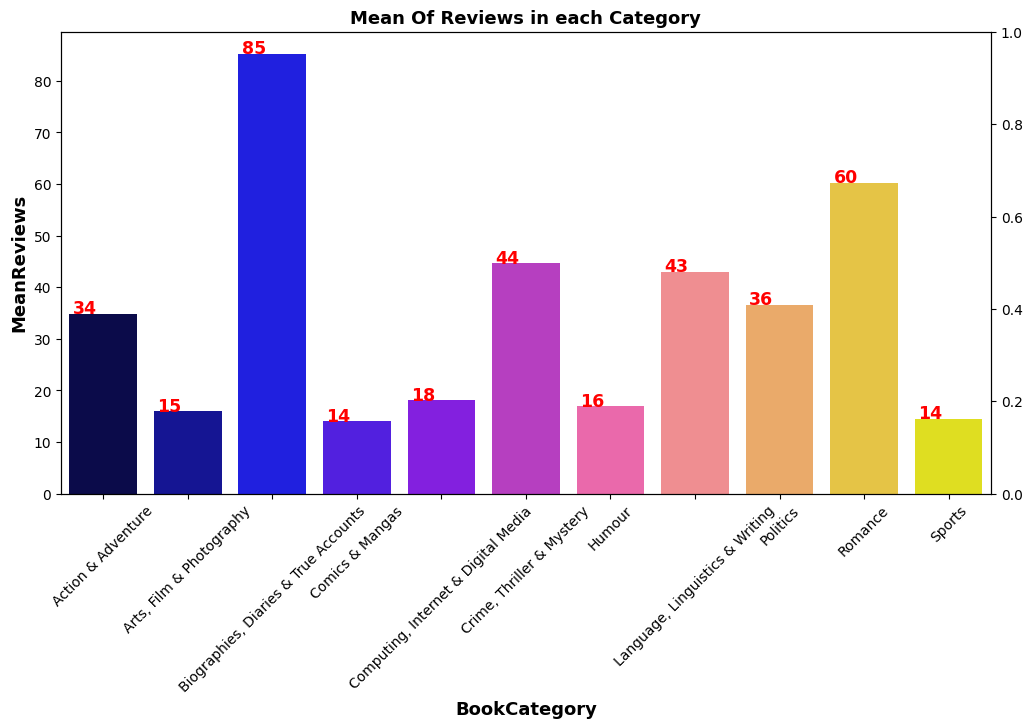

In [28]:
show_barplot_of_feature(category_data.index, category_data['Reviews'], 'Mean Of Reviews in each Category', 'BookCategory', 'MeanReviews')

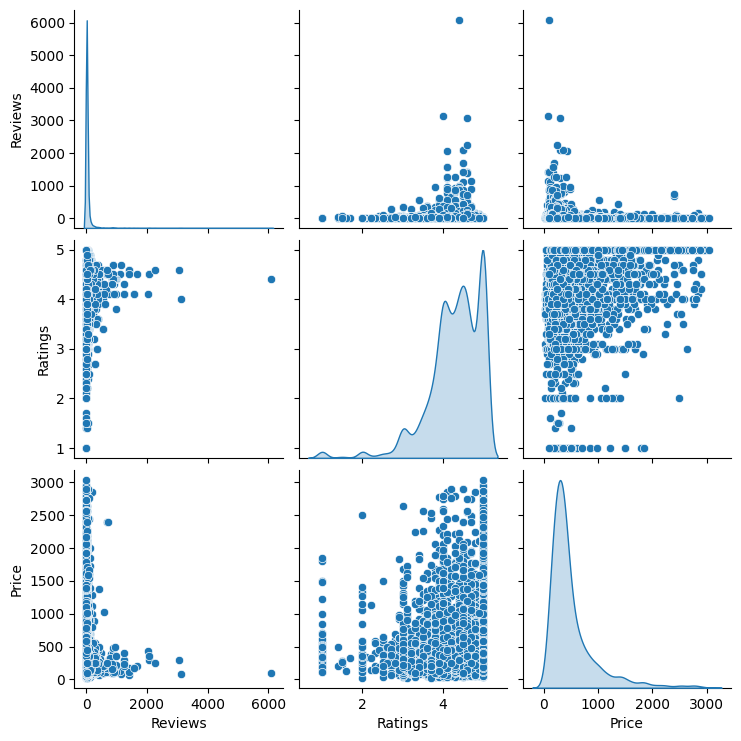

In [29]:
pairplot_feature = ['Reviews', 'Ratings', 'Price']
sns.pairplot(book, vars=pairplot_feature, diag_kind='kde')

In [30]:
book['CoverType'] = None
book['PublishedYear'] = None

for index, row in book.iterrows():
  info = row['Edition'].split(',')
  cover = info[0]
  year = info[1][-4:]
  try:
    year = int(year)
    book.at[index, 'PublishedYear'] = year
  except:
    pass

  book.at[index, 'CoverType'] = cover

In [31]:
book.isna().sum()

Title              0
Author             0
Edition            0
Ratings            0
Reviews            0
Synopsis           0
Genre              0
BookCategory       0
Price              0
CoverType          0
PublishedYear    700
dtype: int64

In [32]:
book['CombineFeatures1'] = book['Synopsis'] + ' ' + book['Title']
book['CombineFeatures2'] = book['Author'] + ' ' + book['Genre'] + ' ' + book['BookCategory'] + ' ' + book['CoverType']

In [33]:
book.shape

(5642, 13)

## Feature transformation

In [34]:
from sklearn.model_selection import train_test_split
X = book.drop(['Price'], axis=1)
y = book['Price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [36]:
tfidf = TfidfVectorizer(analyzer="word",stop_words='english')
tfidf_matrix_train = tfidf.fit_transform(x_train['CombineFeatures1'])
tfidf_matrix_test = tfidf.transform(x_test['CombineFeatures1'])
tfidf_matrix_train.shape, tfidf_matrix_test.shape

((5077, 37153), (565, 37153))

In [37]:
count = CountVectorizer(analyzer="word",stop_words='english')
count_matrix_train = count.fit_transform(x_train['CombineFeatures2'])
count_matrix_test = count.transform(x_test['CombineFeatures2'])
count_matrix_train.shape, count_matrix_test.shape

((5077, 4591), (565, 4591))

In [38]:
train_tfidfvect = pd.DataFrame(data=tfidf_matrix_train.toarray(), index=x_train.index, columns=tfidf.get_feature_names_out())
test_tfidfvect = pd.DataFrame(data=tfidf_matrix_test.toarray(), index=x_test.index, columns=tfidf.get_feature_names_out())
train_countvect = pd.DataFrame(data=count_matrix_train.toarray(), index=x_train.index, columns=count.get_feature_names_out())
test_countvect = pd.DataFrame(data=count_matrix_test.toarray(), index=x_test.index, columns=count.get_feature_names_out())

In [39]:
concat_df_train = pd.concat([x_train, train_tfidfvect, train_countvect], axis=1)
concat_df_test = pd.concat([x_test, test_tfidfvect, test_countvect], axis=1)
concat_df_train.shape, concat_df_test.shape

((5077, 41756), (565, 41756))

In [40]:
concat_df_train.drop(['Title', 'Author', 'Edition', 'Synopsis', 'Genre', 'BookCategory', 'CombineFeatures1', 'CombineFeatures2', 'CoverType', 'PublishedYear'], axis=1, inplace=True)
concat_df_test.drop(['Title', 'Author', 'Edition', 'Synopsis', 'Genre', 'BookCategory', 'CombineFeatures1', 'CombineFeatures2', 'CoverType', 'PublishedYear'], axis=1, inplace=True)

## Modeling

In [41]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

train_df = std_scaler.fit_transform(concat_df_train)
test_df = std_scaler.transform(concat_df_test)

In [42]:
from sklearn.decomposition import PCA, KernelPCA

In [43]:
pca = PCA(n_components=1024, random_state=42)
x_pca_train = pca.fit_transform(train_df)
x_pca_test = pca.transform(test_df)
print('Explained variance ratio: %s' % str(pca.explained_variance_ratio_))

Explained variance ratio: [0.00173325 0.0016581  0.00159763 ... 0.00025832 0.00025763 0.00025719]


Do not change this part of the code only run it!

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def train(X_train, y_train, X_test, y_test):
    """
    Trains a RandomForestRegressor model and evaluates its performance using the mean squared error (MSE).

    Parameters:
    X_train (numpy.ndarray or pandas.DataFrame): The training data with (n_rows, n_features) shape.
    y_train (numpy.ndarray or pandas.Series): The target variable for training data with (n_rows, 1) shape.
    X_test (numpy.ndarray or pandas.DataFrame): The test data with (n_rows, n_features) shape.
    y_test (numpy.ndarray or pandas.Series): The target variable for test data with (n_rows, 1) shape.

    Returns:
    float: The mean squared error (MSE) of the predictions (train data) made by the RandomForestRegressor.
    float: The mean squared error (MSE) of the predictions (test data) made by the RandomForestRegressor.
    """
    random_forest_regressor = RandomForestRegressor(criterion='squared_error')
    random_forest_regressor.fit(X_train, y_train)

    y_pred_train = random_forest_regressor.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)

    y_pred_test = random_forest_regressor.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)

    return random_forest_regressor, mse_train, mse_test

In [45]:
random_forest_regressor, mse_train, mse_test = train(X_train=x_pca_train , y_train=y_train , X_test=x_pca_test , y_test=y_test)
print("Train mse is: {} // Test mse is: {}".format(mse_train, mse_test))

Train mse is: 18830.683280194244 // Test mse is: 151050.45282689718


In [46]:
test = pd.read_excel('/kaggle/input/booktest/test.xlsx')
test.head()

,Unnamed: 0,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,0,Portrait Of A Director:satyajit Ray,Marie Seton,"Paperback,– 19 Jun 2003",4.8 out of 5 stars,10 customer reviews,The definitive study of the life and work of I...,Biographies & Autobiographies (Books),"Arts, Film & Photography"
1,1,More Mindfulness Colouring: More Anti-stress A...,Emma Farrarons,"Paperback,– Import, 24 Sep 2015",3.9 out of 5 stars,6 customer reviews,"Take a few more minutes out of your day, where...","Handicrafts, Decorative Arts & Crafts (Books)","Arts, Film & Photography"
2,2,Palace of Treason: Discover what happens next ...,Jason Matthews,"Paperback,– 21 Apr 2016",3.3 out of 5 stars,3 customer reviews,DISCOVER WHAT HAPPENS NEXT AFTER THE RED SPARR...,Action & Adventure (Books),"Crime, Thriller & Mystery"
3,3,A History of Political Thought: Plato to Marx,Mukherjee,"Paperback,– 2011",3.8 out of 5 stars,74 customer reviews,This book presents a study in political tradit...,Political Ideologies (Books),Politics
4,4,Homer Kelley's Golfing Machine: The Curious Qu...,Scott Gummer,"Paperback,– 4 May 2010",4.0 out of 5 stars,1 customer review,The remarkable true story of a lone genius who...,Baseball (Books),Sports


In [47]:
test = test.rename(columns={'Ratings': 'Reviews', 'Reviews': 'Ratings'})

In [48]:
test.isna().sum()

Unnamed: 0      0
Title           0
Author          0
Edition         0
Ratings         0
Reviews         0
Synopsis        0
Genre           0
BookCategory    0
dtype: int64

In [49]:
test['Ratings'] = test['Ratings'].str.replace(' out of 5 stars', '').astype(float)
test['Reviews'] = test['Reviews'].str.replace(' customer reviews', '')
test['Reviews'] = test['Reviews'].str.replace(' customer review', '')
test['Reviews'] = test['Reviews'].str.replace(',', '')
test['Reviews'] = test['Reviews'].astype(float)

In [50]:
test['CoverType'] = None
test['PublishedYear'] = None

for index, row in test.iterrows():
  info = row['Edition'].split(',')
  cover = info[0]
  year = info[1][-4:]
  try:
    year = int(year)
    test.at[index, 'PublishedYear'] = year
  except:
    pass

  test.at[index, 'CoverType'] = cover

In [51]:
test.isna().sum()

Unnamed: 0        0
Title             0
Author            0
Edition           0
Ratings           0
Reviews           0
Synopsis          0
Genre             0
BookCategory      0
CoverType         0
PublishedYear    72
dtype: int64

In [52]:
test['CombineFeatures1'] = test['Synopsis'] + ' ' + test['Title']
test['CombineFeatures2'] = test['Author'] + ' ' + test['Genre'] + ' ' + test['BookCategory'] + ' ' + test['CoverType']
test.head()

,Unnamed: 0,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,CoverType,PublishedYear,CombineFeatures1,CombineFeatures2
0,0,Portrait Of A Director:satyajit Ray,Marie Seton,"Paperback,– 19 Jun 2003",4.8,10.0,The definitive study of the life and work of I...,Biographies & Autobiographies (Books),"Arts, Film & Photography",Paperback,2003,The definitive study of the life and work of I...,Marie Seton Biographies & Autobiographies (Boo...
1,1,More Mindfulness Colouring: More Anti-stress A...,Emma Farrarons,"Paperback,– Import, 24 Sep 2015",3.9,6.0,"Take a few more minutes out of your day, where...","Handicrafts, Decorative Arts & Crafts (Books)","Arts, Film & Photography",Paperback,None,"Take a few more minutes out of your day, where...","Emma Farrarons Handicrafts, Decorative Arts & ..."
2,2,Palace of Treason: Discover what happens next ...,Jason Matthews,"Paperback,– 21 Apr 2016",3.3,3.0,DISCOVER WHAT HAPPENS NEXT AFTER THE RED SPARR...,Action & Adventure (Books),"Crime, Thriller & Mystery",Paperback,2016,DISCOVER WHAT HAPPENS NEXT AFTER THE RED SPARR...,Jason Matthews Action & Adventure (Books) Crim...
3,3,A History of Political Thought: Plato to Marx,Mukherjee,"Paperback,– 2011",3.8,74.0,This book presents a study in political tradit...,Political Ideologies (Books),Politics,Paperback,2011,This book presents a study in political tradit...,Mukherjee Political Ideologies (Books) Politic...
4,4,Homer Kelley's Golfing Machine: The Curious Qu...,Scott Gummer,"Paperback,– 4 May 2010",4.0,1.0,The remarkable true story of a lone genius who...,Baseball (Books),Sports,Paperback,2010,The remarkable true story of a lone genius who...,Scott Gummer Baseball (Books) Sports Paperback


In [155]:
test['Category'] = None
for index, row in test.iterrows():
  test.at[index, 'Category'] = code_dict[row['BookCategory']]   

In [53]:
tfidf_matrix_final_test = tfidf.transform(test['CombineFeatures1'])
count_matrix_final_test = count.transform(test['CombineFeatures2'])
final_test_tfidfvect = pd.DataFrame(data=tfidf_matrix_final_test.toarray(), index=test.index, columns=tfidf.get_feature_names_out())
final_test_countvect = pd.DataFrame(data=count_matrix_final_test.toarray(), index=test.index, columns=count.get_feature_names_out())
concat_df_final_test = pd.concat([test, final_test_tfidfvect, final_test_countvect], axis=1)
concat_df_final_test.drop(['Unnamed: 0', 'Title', 'Author', 'Edition', 'Synopsis', 'Genre', 'BookCategory', 'CombineFeatures1', 'CombineFeatures2', 'CoverType', 'PublishedYear'], axis=1, inplace=True)
final_test_df = std_scaler.transform(concat_df_final_test)
x_pca_final_test = pca.transform(final_test_df)

In [54]:
y_pred_final_test = random_forest_regressor.predict(x_pca_final_test)
y_pred_final_test

array([ 509.3506    ,  369.3917    ,  316.18      ,  438.6806    ,
        582.8918    ,  991.82374286,  319.9733    , 1345.2089    ,
        565.3675    ,  829.83851667,  284.58496667,  703.476     ,
        559.685     ,  465.5567    , 1120.62676667,  487.3292    ,
        350.3518    ,  535.6204    ,  515.2712    ,  416.556     ,
        318.57346667,  366.0751    ,  726.39275   ,  396.814     ,
        446.5305    ,  491.3866    ,  665.5179    ,  896.2548    ,
        447.1219    ,  354.5273    ,  307.4189    ,  776.6099    ,
         67.1752    ,  421.4809    ,  362.8939    ,  425.9434    ,
        740.2465    , 1086.5384    ,  482.0199    ,  680.1114    ,
        566.8887    ,  741.8214    ,  366.6975    ,  311.9571    ,
        364.17186667,  418.2582    ,  375.6982    ,  251.2375    ,
        364.7036    ,  356.5736    , 1565.3006    ,  580.219     ,
        749.5969    ,  406.60091429,  453.9765    ,  402.43473333,
        724.5263    ,  891.5526    ,  421.915     ,  749.1893 

In [55]:
prediction = pd.DataFrame(y_pred_final_test, index=test.index, columns=['Price'])
prediction = prediction.reset_index()
prediction

,index,Price
0,0,509.350600
1,1,369.391700
2,2,316.180000
3,3,438.680600
4,4,582.891800
...,...,...
532,532,405.547871
533,533,401.525250
534,534,349.783000
535,535,322.511400


In [56]:
prediction.to_csv('/kaggle/working/pred.csv', index=False)

## Post processing

Error Analysis: Analyzing the model's errors on the test data can provide valuable insights into its strengths and weaknesses. This involves identifying common error patterns, understanding the causes of errors, and exploring strategies to mitigate them.

Feature Importance Analysis: Identifying the most important features contributing to the model's predictions can help in feature selection and dimensionality reduction. This can lead to a more efficient and interpretable preprocessing pipeline.